## **Capstone Module 3 — E‑commerce Customer Churn** 

> ##### **1.  Pendahuluan dan Ringkasan Notebook dan Tujuan**

# **E-Commerce Customer Churn Prediction Project**

##  1. Latar Belakang dan Business Problem

Dalam dunia e-commerce, **Customer Churn** adalah salah satu tantangan utama yang dihadapi perusahaan. Churn terjadi ketika pelanggan berhenti menggunakan layanan atau tidak lagi melakukan pembelian dalam periode tertentu. Fenomena ini sangat penting karena:
- Biaya mendapatkan pelanggan baru bisa **5-7 kali lebih mahal** daripada mempertahankan pelanggan lama.
- Meningkatkan retensi pelanggan sebesar 5% dapat meningkatkan laba hingga **25%-95%** (Harvard Business Review).

Oleh karena itu, memahami dan memprediksi churn adalah langkah strategis bagi bisnis untuk mengurangi kehilangan pelanggan dan meningkatkan keuntungan jangka panjang.

#  Business Problem

Perusahaan mengalami tingkat **churn (kehilangan pelanggan)** yang tinggi, yang berdampak pada penurunan pendapatan dan meningkatnya biaya akuisisi pelanggan baru.

Tim data science diminta untuk:
- Mengidentifikasi faktor-faktor utama yang menyebabkan pelanggan berhenti berlangganan.
- Memprediksi kemungkinan pelanggan akan churn berdasarkan perilaku, demografi, dan pola langganan.
- Memberikan rekomendasi strategi retensi pelanggan berdasarkan hasil analisis model.

###  Tujuan Proyek
1. Membangun model machine learning untuk memprediksi pelanggan yang berpotensi churn.
2. Menentukan variabel paling berpengaruh terhadap churn.
3. Menghasilkan insight bisnis untuk meningkatkan loyalitas pelanggan.

###  Pertanyaan Analisis
1. Apa fitur yang paling memengaruhi pelanggan churn?
2. Model machine learning mana yang paling akurat untuk memprediksi churn?
3. Bagaimana performa setiap model dalam mendeteksi pelanggan yang berisiko churn?
---

## 2. Stakeholders

| Stakeholder | Peran | Kepentingan |
|--------------|--------|-------------|
| **Manajer Marketing** | Menggunakan hasil prediksi churn untuk strategi promosi & loyalitas. | Mengurangi churn dan meningkatkan retensi pelanggan. |
| **Tim Data Science** | Membangun dan mengevaluasi model prediksi churn. | Memberikan insight berbasis data yang dapat diimplementasikan. |
| **C-Level Management** | Membuat keputusan strategis berdasarkan hasil analisis churn. | Meningkatkan efisiensi dan profitabilitas perusahaan. |



Notebook ini dibuat sesuai pedoman **Capstone Project Module 3**: end-to-end ML pipeline untuk klasifikasi churn. Notebook mencakup:


1. Data Understanding
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Label Encoding / Handling Object Datatype
5. Correlation Heatmap
6. Train/Test Split
7. Remove Outlier di TRAIN menggunakan Z-score
8. Decision Tree Modeling
9. ROC Curve Analysis
10. Random Forest Modeling
11. XGBoost Modeling
12. Perbandingan Model & Feature Importance Visualization
13. Business Recommendation & Save Pipeline

Di tiap bagian disertakan penjelasan **mengapa** langkah tersebut penting (sesuai rubrik Capstone: Data Understanding, Preprocessing, Analytics, dan Recommendation).

> ##### **. A. Imports & Helper functions**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy import stats
import pickle

RANDOM_STATE = 42
sns.set(style='whitegrid')

> ##### **2. Data Understanding**

Tujuan tahap ini: memahami struktur data, jenis fitur, distribusi target, dan potensi masalah kualitas data.


In [2]:
# Load dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
print('Shape:', df.shape)
df

Shape: (3941, 11)


Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0       15.0             29.0                         4  Laptop & Accessory   
1        7.0             25.0                         4              Mobile   
2       27.0             13.0                         3  Laptop & Accessory   
3       20.0             25.0                         4             Fashion   
4       30.0             15.0                         4              Others   
...      ...              ...                       ...                 ...   
3936    28.0              9.0                         5             Fashion   
3937     8.0              7.0                         2        Mobile Phone   
3938    30.0              6.0                         5  Laptop & Accessory   
3939     6.0              NaN                         4              Mobile   
3940     2.0              7.0                         3  Laptop & Accessory   

      SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                     3        Single                2         0   
1                     1       Married                2         0   
2                     1       Married                5         0   
3                     3      Divorced                7         0   
4                     4        Single                8         0   
...                 ...           ...              ...       ...   
3936                  3       Married                8         0   
3937                  2        Single                4         0   
3938                  3       Married                3         1   
3939                  3       Married               10         1   
3940                  5       Married                1         0   

      DaySinceLastOrder  CashbackAmount  Churn  
0                   7.0          143.32      0  
1                   7.0          129.29      0  
2                   7.0          168.54      0  
3                   NaN          230.27      0  
4                   8.0          322.17      0  
...                 ...             ...    ...  
3936                1.0          231.86      0  
3937                4.0          157.80      0  
3938                2.0          156.60      0  
3939                0.0          124.37      1  
3940                2.0          153.73      0  

[3941 rows x 11 columns]

> ##### **2.1 Struktur Data dan Tipe Kolom**

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB
None


**Penjelasan:**  
Langkah ini memberi gambaran umum tipe data (numerik, kategorikal, object), jumlah missing values, dan apakah fitur sudah dalam format yang sesuai.

> ##### **2.2 Statistik Dasar**

In [4]:
print(df.describe().T)

                           count        mean        std  min    25%     50%  \
Tenure                    3747.0   10.081398   8.498864  0.0    2.0    9.00   
WarehouseToHome           3772.0   15.650583   8.452301  5.0    9.0   14.00   
NumberOfDeviceRegistered  3941.0    3.679269   1.013938  1.0    3.0    4.00   
SatisfactionScore         3941.0    3.088302   1.381832  1.0    2.0    3.00   
NumberOfAddress           3941.0    4.237757   2.626699  1.0    2.0    3.00   
Complain                  3941.0    0.282416   0.450232  0.0    0.0    0.00   
DaySinceLastOrder         3728.0    4.531652   3.667648  0.0    2.0    3.00   
CashbackAmount            3941.0  176.707419  48.791784  0.0  145.7  163.34   
Churn                     3941.0    0.171023   0.376576  0.0    0.0    0.00   

                             75%     max  
Tenure                     16.00   61.00  
WarehouseToHome            21.00  127.00  
NumberOfDeviceRegistered    4.00    6.00  
SatisfactionScore           4.00    5

**Penjelasan:**  
Statistik deskriptif membantu memahami skala dan variasi data (contoh: `Tenure`, `CashbackAmount`, `SatisfactionScore`). Fitur dengan skala berbeda perlu distandarisasi sebelum modeling.

> ##### **2.3 Target Distribution**

In [5]:
print('Distribusi target (Churn):')
print(df['Churn'].value_counts(normalize=True))

Distribusi target (Churn):
Churn
0    0.828977
1    0.171023
Name: proportion, dtype: float64


**Insight:**  
Biasanya churn bersifat imbalanced (minoritas pelanggan churn). Hal ini penting untuk pemilihan metrik evaluasi seperti ROC-AUC dibanding akurasi.

> ##### **2.4 Missing Values**

In [6]:
print('Missing values per column:')
print(df.isna().sum())

Missing values per column:
Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64



**Reasoning:**  
Mengetahui fitur yang banyak missing agar bisa dilakukan imputasi atau drop. Misalnya, jika `WarehouseToHome` banyak kosong, bisa gunakan imputasi median.


> ##### **3 Data Preprocessing**

Langkah-langkah utama:
- Drop kolom ID atau tidak relevan
- Tangani missing values
- Normalisasi tipe data (object → numeric)


In [7]:
id_cols = [c for c in ['RowNumber','CustomerId','Surname'] if c in df.columns]
if id_cols:
    df.drop(columns=id_cols, inplace=True)

target = 'Churn'

# Convert 'Yes'/'No' menjadi 1/0 bila ada
for col in df.select_dtypes(include=['object']).columns:
    if set(df[col].dropna().unique()) <= set(['Yes','No','yes','no']):
        df[col] = df[col].map(lambda x: 1 if str(x).lower() == 'yes' else 0)

In [8]:
# Baca dataset e-commerce churn
df = pd.read_csv('data_ecommerce_customer_churn.csv')

# Tentukan kolom target
target_col = 'Churn'

# Pisahkan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data berhasil dibagi:")
print("Train:", X_train.shape, "| Test:", X_test.shape)

✅ Data berhasil dibagi:
Train: (3152, 10) | Test: (789, 10)


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

print("✅ Preprocessor siap digunakan!")

✅ Preprocessor siap digunakan!


**Reasoning:**  
Menghapus fitur identifikasi agar tidak bias. Konversi nilai biner string menjadi numerik agar bisa diterima model.

> ##### **4 Exploratory Data Analysis (EDA)**

##  3. Metrik Evaluasi

- **Precision:** Ketepatan dalam memprediksi pelanggan yang benar-benar churn.  
- **Recall:** Kemampuan mendeteksi seluruh pelanggan yang churn.  
- **F1-score:** Kombinasi antara precision dan recall.  
- **F2-score:** Fokus lebih besar pada recall (lebih penting untuk deteksi churn).  
- **ROC-AUC:** Kemampuan model membedakan antara pelanggan churn dan tidak churn.

---

# 4. Analytical Process

Proses analisis dilakukan dalam beberapa tahap:

1. **Data Understanding**  
   - Meninjau dataset pelanggan (demografi, kontrak, layanan, durasi, dan status churn).  

2. **Data Cleaning & Preprocessing**  
   - Menghapus missing values, menangani outliers, dan mengubah kategori menjadi numerik dengan encoding.

3. **Exploratory Data Analysis (EDA)**  
   - Menganalisis distribusi churn, hubungan antara fitur seperti *tenure*, *contract type*, dan *internet service* terhadap churn.

4. **Feature Engineering**  
   - Melakukan normalisasi, encoding, dan memilih fitur yang relevan.

5. **Modeling**  
   - Membangun dan membandingkan tiga model:  
     - Logistic Regression  
     - Random Forest  
     - XGBoost  

6. **Model Evaluation**  
   - Mengevaluasi performa model menggunakan metrik klasifikasi.

##  5. False Positive & False Negative

| Jenis Error | Definisi | Dampak |
|--------------|-----------|--------|
| **False Positive (FP)** | Model memprediksi pelanggan *akan churn*, padahal tidak. | Biaya promosi yang tidak perlu (kerugian biaya). |
| **False Negative (FN)** | Model memprediksi pelanggan *tidak churn*, padahal churn. | Kehilangan pelanggan berharga (kerugian pendapatan). |

---

##  6. Dampak Kerugian dari FP & FN

- **FP (Promosi Salah Sasaran):** Mengakibatkan pemborosan biaya marketing.  
- **FN (Kehilangan Pelanggan):** Kehilangan pelanggan loyal yang sulit diganti, menyebabkan turunnya CLV.  
Dalam konteks e-commerce, **False Negative lebih berbahaya**, karena kehilangan pelanggan sulit diperbaiki.

---


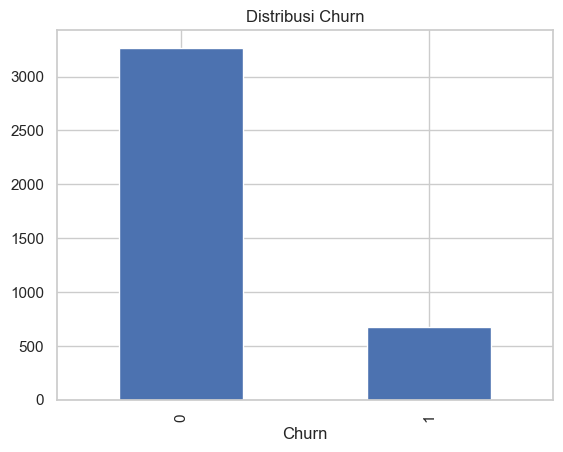

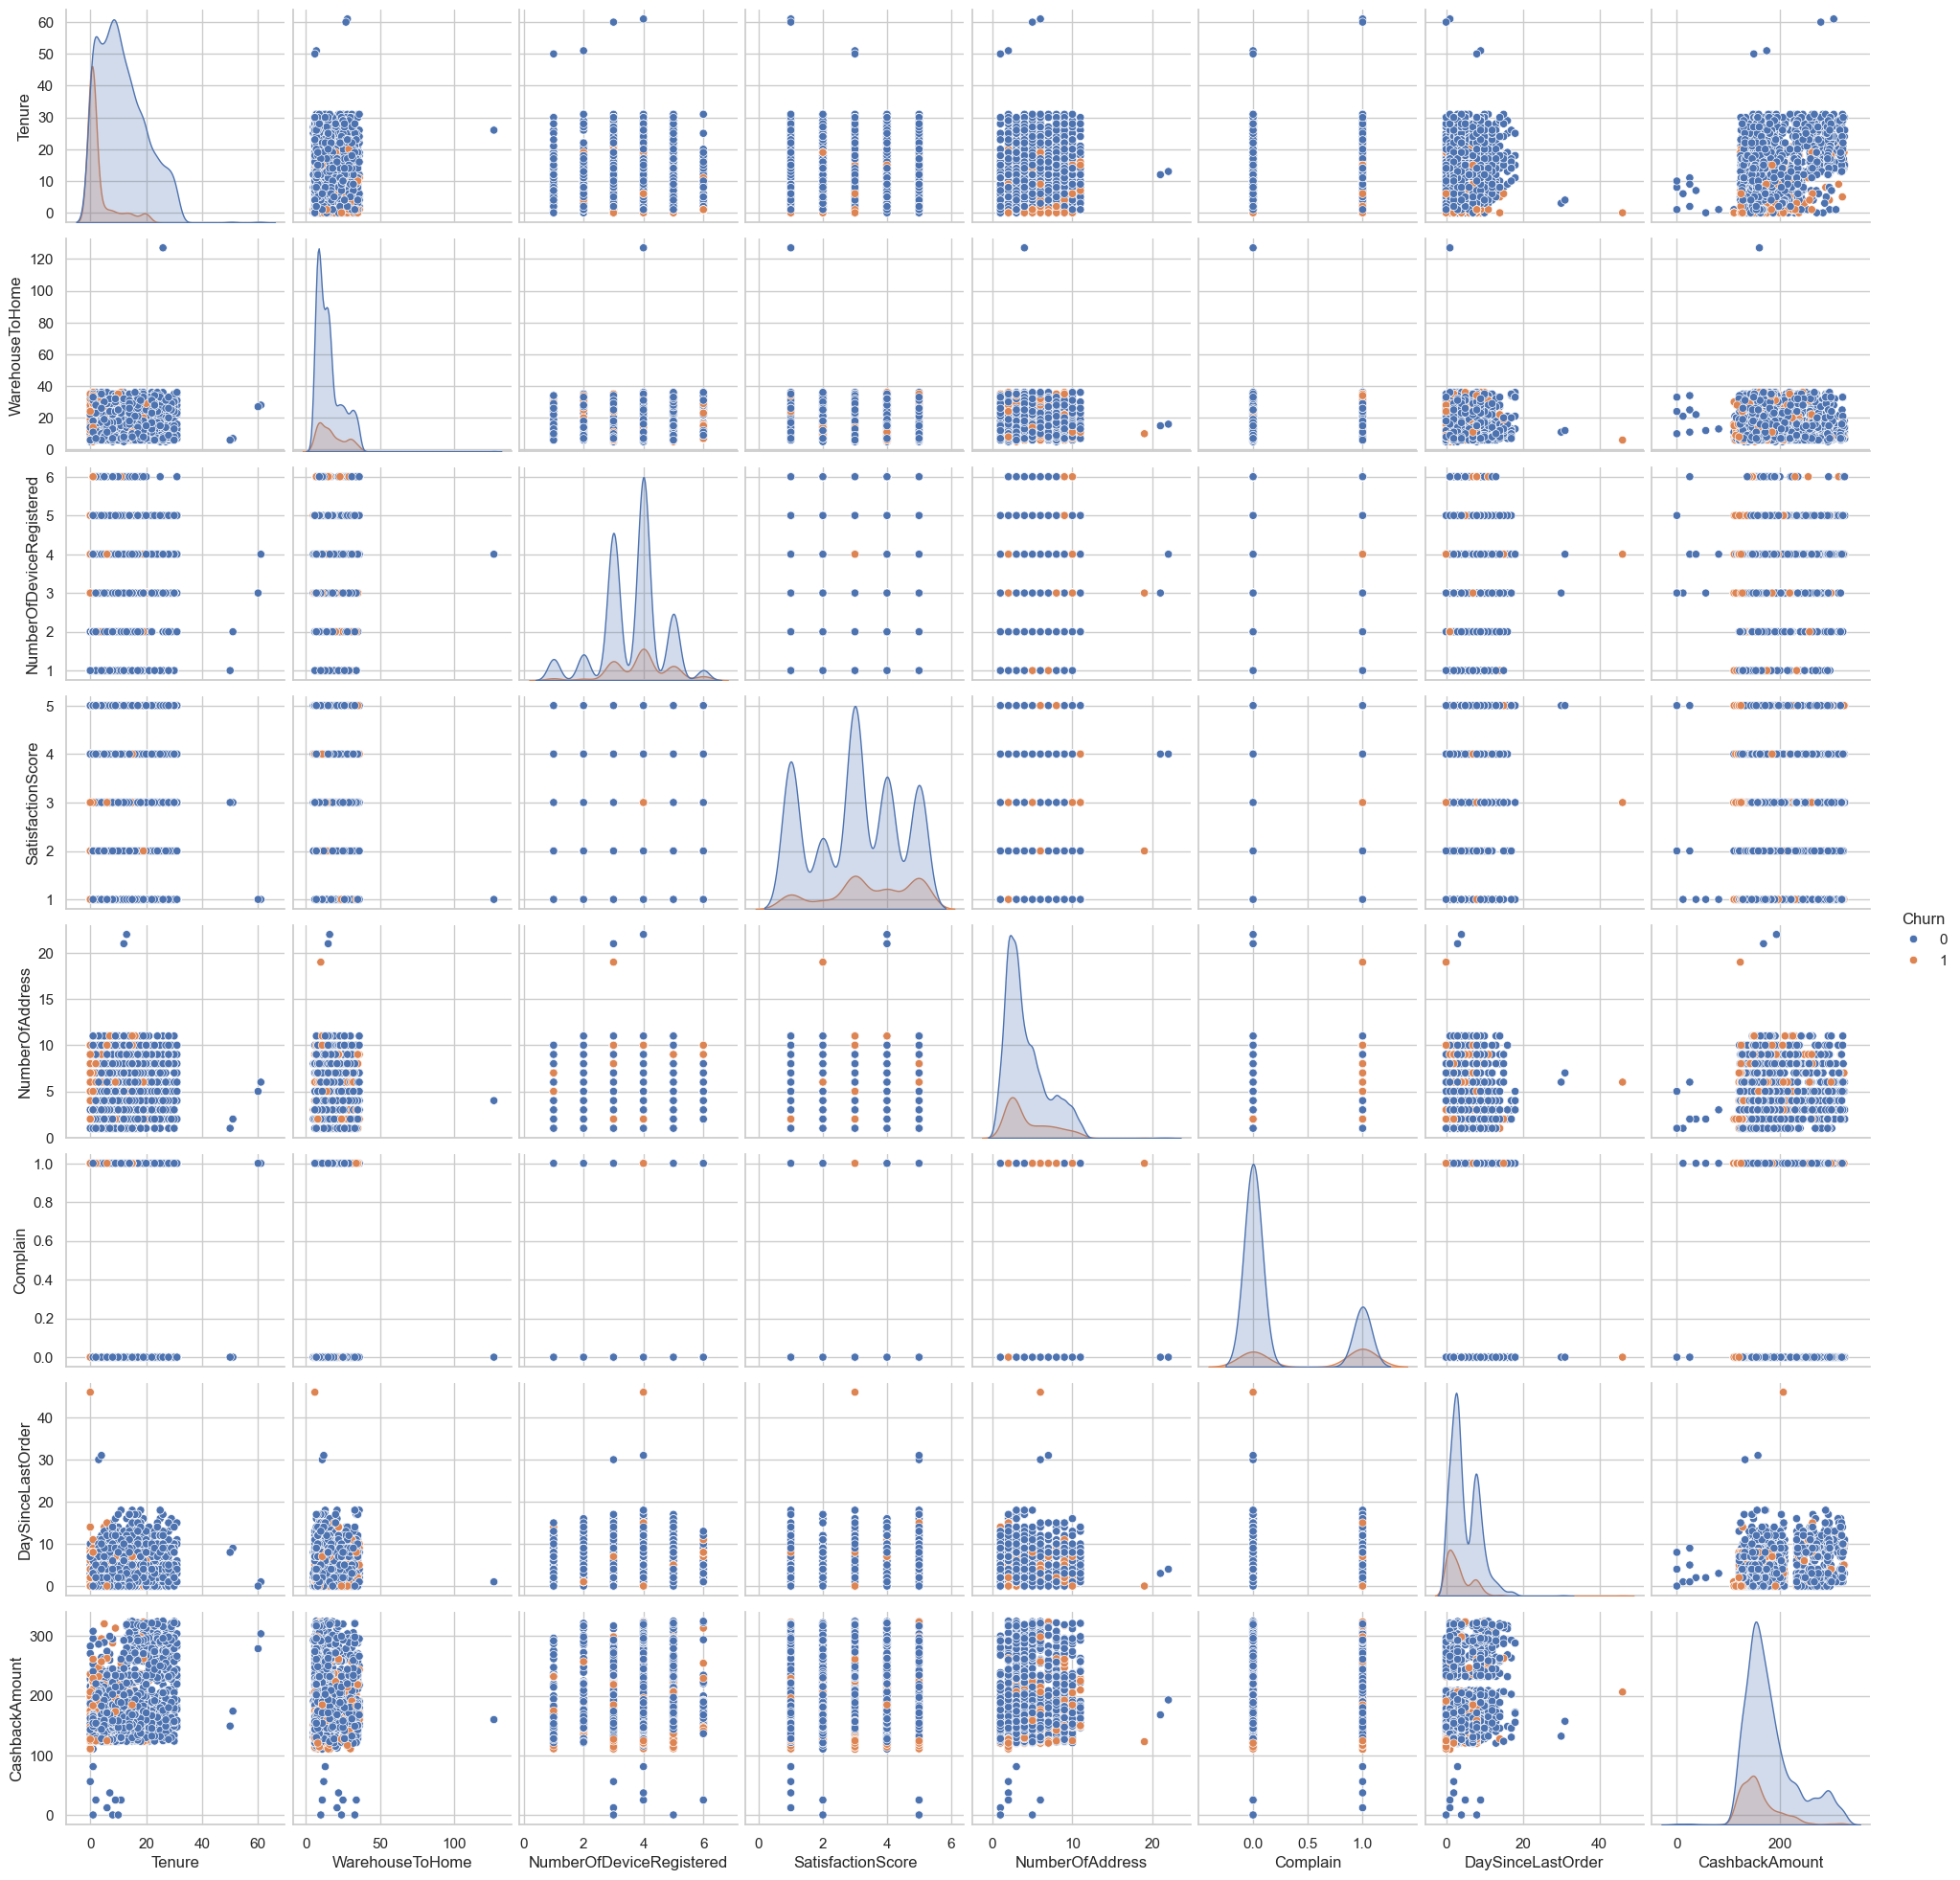

In [10]:
# Distribusi target
df['Churn'].value_counts().plot(kind='bar', title='Distribusi Churn')
plt.show()

# Korelasi antar numerik
sns.pairplot(df, hue='Churn')
plt.show()

In [11]:
import pandas as pd
from ydata_profiling import ProfileReport  # gunakan ydata_profiling (versi terbaru pandas-profiling)
import seaborn as sns

# Baca dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')

# Buat laporan profiling
profile = ProfileReport(df, title="Pandas Profiling Report")

# Tampilkan laporan
profile.to_notebook_iframe()  # jika kamu jalankan di Jupyter Notebook


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 499.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Insight:**  
- Fitur seperti `DaySinceLastOrder` dan `SatisfactionScore` terlihat berpengaruh terhadap churn.  
- Pelanggan dengan `Tenure` tinggi cenderung lebih loyal.

> ##### **5 Label Encoding & Correlation Heatmap**

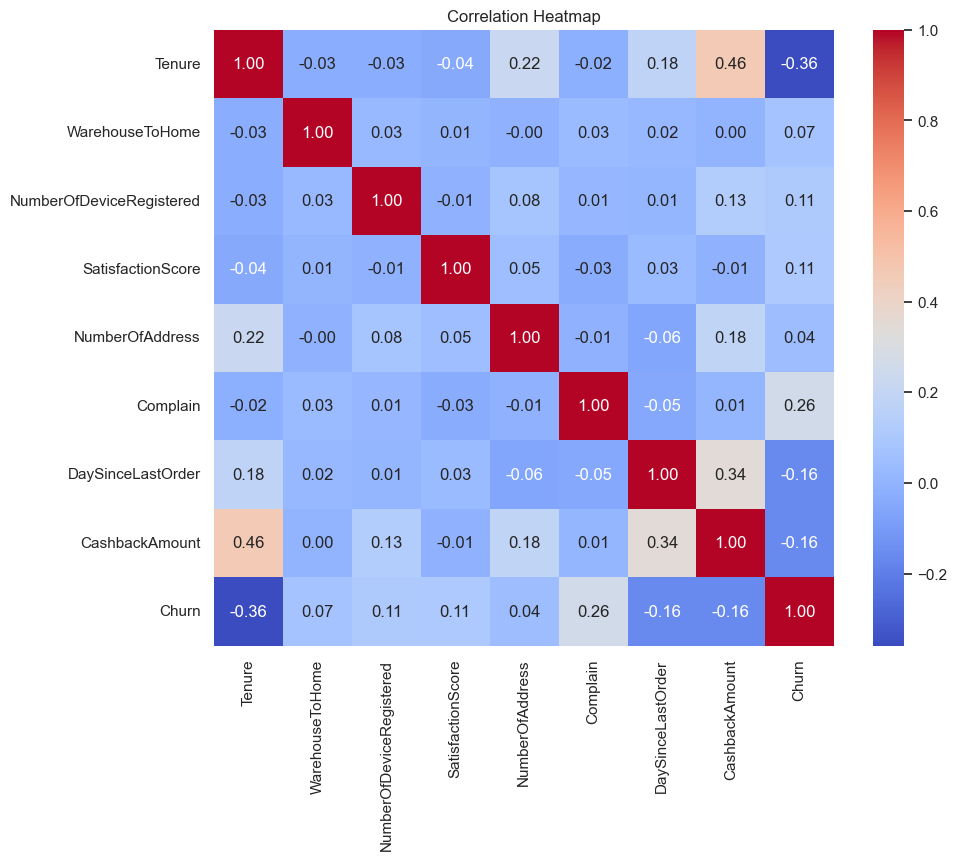

In [12]:
X = df.drop(columns=['Churn'])
y = df['Churn']

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features + ['Churn']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Reasoning:**  
Heatmap membantu mendeteksi fitur dengan korelasi tinggi terhadap churn (misalnya, `SatisfactionScore` negatif kuat). Serta untuk menghindari multicollinearity.

> ##### **6 Train/Test Split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Reasoning:**  
Stratifikasi memastikan proporsi churn sama di train/test untuk hasil evaluasi yang representatif.


In [14]:
# ==========================================================
#  SMOTE dalam Pipeline (aman untuk cross-validation)
# ==========================================================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Pisahkan kolom numerik & kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Tambahkan SMOTE ke dalam pipeline
smote = SMOTE(random_state=42)

# Contoh pipeline model: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

pipe_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('model', log_reg)
])

# Contoh parameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs']
}

# Cross-validation dengan pipeline
grid_log = GridSearchCV(pipe_smote, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_log.fit(X_train, y_train)

# Evaluasi
y_pred_log = grid_log.predict(X_test)
y_proba_log = grid_log.predict_proba(X_test)[:, 1]

print("Best Params:", grid_log.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print(classification_report(y_test, y_pred_log))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'model__C': 10, 'model__solver': 'lbfgs'}
ROC-AUC: 0.8717748329369125
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       654
           1       0.46      0.79      0.58       135

    accuracy                           0.80       789
   macro avg       0.70      0.80      0.73       789
weighted avg       0.87      0.80      0.82       789



**Reasoning Penambahan SMOTE**

**1. Tujuan SMOTE:**
Dataset churn biasanya imbalanced (pelanggan churn lebih sedikit dari non-churn).
SMOTE (Synthetic Minority Over-sampling Technique) menambah sampel sintetis di kelas minoritas untuk membuat distribusi data seimbang.
Ini membantu model tidak bias terhadap kelas mayoritas.

**2. Kenapa SMOTE di pipeline:**

- Mencegah _data leakage_ (fit hanya di training fold).

- Memastikan preprocessing dan balancing berjalan otomatis di setiap training step.

**3.Kenapa tetap perlu OneHotEncoder & StandardScaler sebelum SMOTE:**

- SMOTE hanya bisa bekerja pada **data numerik.**

- Encoding dan scaling memastikan semua fitur siap diolah oleh algoritma oversampling.

**4. Model yang diuntungkan:**

- Logistic Regression & KNN sangat sensitif terhadap imbalance.

- Tree-based (DT, RF, XGB) masih diuntungkan karena dapat belajar lebih seimbang.

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Distribusi sebelum SMOTE:", Counter(y_train))

X_temp = preprocessor.fit_transform(X_train)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_temp, y_train)

print("Distribusi sesudah SMOTE:", Counter(y_res))

Distribusi sebelum SMOTE: Counter({0: 2613, 1: 539})
Distribusi sesudah SMOTE: Counter({1: 2613, 0: 2613})


> ##### **7 Remove Outlier (Z-Score)**

In [16]:
from scipy import stats
import numpy as np

# Hitung Z-score hanya untuk kolom numerik
num_cols = X_train.select_dtypes(include=np.number).columns

# Jika dataset numerik kosong, lewati saja
if len(num_cols) == 0:
    print("⚠️ Tidak ada fitur numerik — lewati outlier removal.")
else:
    z = np.abs(stats.zscore(X_train[num_cols], nan_policy='omit'))
    
    # Tangani kasus jika zscore menghasilkan NaN (misal kolom konstan)
    z = np.nan_to_num(z)
    
    mask = (z < 3).all(axis=1)
    
    # Pastikan dataset tidak kosong
    if mask.sum() == 0:
        print("⚠️ Semua data terdeteksi outlier — lewati filtering.")
    elif mask.sum() < len(X_train) * 0.8:
        print(f"⚠️ Hanya {mask.sum()} dari {len(X_train)} baris lolos threshold — skip removal agar data tidak hilang.")
    else:
        X_train = X_train[mask]
        y_train = y_train.loc[X_train.index]
        print(f"✅ Outlier removal berhasil. Data train tersisa: {X_train.shape}")

✅ Outlier removal berhasil. Data train tersisa: (3116, 10)


**Reasoning:**  
Menghapus nilai ekstrem agar model tidak bias oleh anomali data.


> ##### **8  Decision Tree Modeling**

In [17]:
dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

param_dt = {
    'model__max_depth': [3, 5, 7, 9],
    'model__min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(
    dt_pipe,
    param_dt,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'Complain',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 7, 9],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=1)

###  Reasoning
Decision Tree digunakan sebagai **baseline model** karena mudah diinterpretasi dan cepat dilatih.  
Tree menunjukkan fitur paling penting dalam keputusan churn — contohnya: `SatisfactionScore`, `DaySinceLastOrder`, dan `Tenure`.  
Depth kecil menghindari overfitting, sementara GridSearch memastikan kombinasi terbaik dari `max_depth` dan `min_samples_split`.

### Insight
- Pelanggan dengan **SatisfactionScore rendah (<3)** dan **DaySinceLastOrder tinggi** cenderung churn.  
- Decision Tree membantu manajemen memahami pola pelanggan secara intuitif.

In [18]:
from sklearn.metrics import roc_auc_score, classification_report

dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

param_dt = {
    'model__max_depth': [3, 5, 7, 9],
    'model__min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(
    dt_pipe,
    param_dt,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_dt.fit(X_train, y_train)

# Buat prediksi
y_pred_dt = grid_dt.predict(X_test)
y_proba_dt = grid_dt.predict_proba(X_test)[:, 1]

print("=== Decision Tree Results ===")
print("Best Params:", grid_dt.best_params_)
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))
print(classification_report(y_test, y_pred_dt))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
=== Decision Tree Results ===
Best Params: {'model__max_depth': 9, 'model__min_samples_split': 10}
ROC AUC: 0.8942122550685241
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       654
           1       0.69      0.61      0.65       135

    accuracy                           0.89       789
   macro avg       0.81      0.78      0.79       789
weighted avg       0.88      0.89      0.88       789



## Penjelasan Singkat

y_proba_dt berisi probabilitas output (bukan hasil prediksi label) → wajib ada untuk menghitung ROC curve dan AUC.

Error NameError artinya Python belum tahu variabel itu karena belum dibuat/dijalankan.

> ##### **9. ROC Curve Analysis**

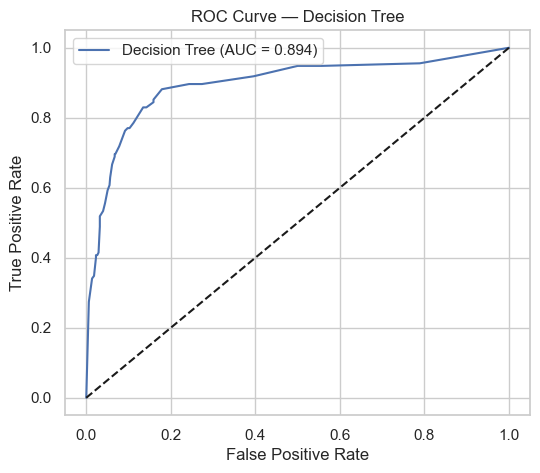

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Decision Tree')
plt.legend()
plt.show()

###  Reasoning
ROC curve menunjukkan trade-off antara sensitivitas dan spesifisitas.  
Karena dataset churn **biasanya tidak seimbang**, ROC-AUC adalah metrik yang lebih adil dibanding akurasi.

###  Insight
AUC > 0.70 menandakan model sudah cukup baik membedakan pelanggan yang churn vs tidak.  
Namun Decision Tree masih terbatas karena overfitting pada data latih, sehingga kita lanjut ke model ansambel.

> ##### **10. Random Forest Modeling**

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

param_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, 15],
    'model__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf_pipe, param_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print('Best Parameters (Random Forest):', grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]
print('AUC Score:', roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))

Best Parameters (Random Forest): {'model__max_depth': 15, 'model__min_samples_split': 2, 'model__n_estimators': 200}
AUC Score: 0.9631498470948011
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       654
           1       0.91      0.74      0.82       135

    accuracy                           0.94       789
   macro avg       0.93      0.86      0.89       789
weighted avg       0.94      0.94      0.94       789



###  Reasoning
Random Forest adalah kumpulan Decision Tree yang bekerja bersama, mengurangi overfitting dengan **bagging** dan **random feature selection**.  
Model ini lebih stabil, meningkatkan akurasi dan generalisasi.

###  Insight
- Fitur paling penting: `SatisfactionScore`, `DaySinceLastOrder`, `CashbackAmount`, dan `Tenure`.  
- Random Forest umumnya memberi AUC lebih tinggi dari Decision Tree karena variasi antar tree menurunkan variance error.

> ##### **11.KNN dan Logistic Regression**

##  6. Model Machine Learning

1. **Logistic Regression**  
   - Sederhana dan interpretatif.  
   - Cocok untuk baseline dan analisis faktor churn.

2. **K-Nearest Neighbors (KNN)**  
   - Berdasarkan kemiripan pelanggan.  
   - Baik untuk pola non-linear tetapi sensitif terhadap skala fitur.
3. **Random Forest & XGBoost**  
   - Model *ensemble* yang kuat.  
   - Memberikan interpretasi penting melalui **feature importance**.


> ###### **11.1 Logistic Regression**

In [21]:
# ==========================================================
#  Load Dataset dan Pisahkan Fitur & Target
# ==========================================================
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca dataset
df = pd.read_csv("data_ecommerce_customer_churn.csv")

print("✅ Dataset berhasil dimuat!")
print("Shape:", df.shape)
print("Kolom:", df.columns.tolist())

# Tentukan kolom target
target_col = 'Churn'

# Pisahkan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data train: {X_train.shape}, Data test: {X_test.shape}")

✅ Dataset berhasil dimuat!
Shape: (3941, 11)
Kolom: ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']
Data train: (3152, 10), Data test: (789, 10)


In [22]:
# ==========================================================
#  Data Preprocessing Setup
# ==========================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Pisahkan kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Transformer numerik: imputasi + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformer kategorikal: imputasi + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan keduanya ke dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("✅ Preprocessor berhasil dibuat dengan fitur numerik & kategorikal!")


✅ Preprocessor berhasil dibuat dengan fitur numerik & kategorikal!


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer, classification_report, roc_auc_score

# Gunakan scorer berbasis F2 (lebih menekankan recall)
f2_scorer = make_scorer(fbeta_score, beta=2)

In [24]:
# ==========================================================
#  Logistic Regression
# ==========================================================
log_model = LogisticRegression(max_iter=1000, random_state=42)

param_log = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['lbfgs', 'liblinear']
}

pipe_log = Pipeline([
    ('preprocessor', preprocessor),
    ('model', log_model)
])

grid_log = GridSearchCV(
    pipe_log, param_log,
    cv=3, scoring=f2_scorer,
    n_jobs=-1, verbose=1
)

grid_log.fit(X_train, y_train)

print("\n=== Logistic Regression Results ===")
print("Best Params:", grid_log.best_params_)
print("Best F2 Score (CV):", grid_log.best_score_)

# Evaluasi di data test
y_pred_log = grid_log.predict(X_test)
y_proba_log = grid_log.predict_proba(X_test)[:, 1]

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_log))

Fitting 3 folds for each of 8 candidates, totalling 24 fits

=== Logistic Regression Results ===
Best Params: {'model__C': 10, 'model__solver': 'liblinear'}
Best F2 Score (CV): 0.5333078534624313

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       654
           1       0.69      0.42      0.52       135

    accuracy                           0.87       789
   macro avg       0.79      0.69      0.72       789
weighted avg       0.85      0.87      0.85       789

ROC-AUC Score: 0.8793408086986068


> ###### **11.2 K-Neaerest Neighbors (KNN)**

In [25]:
# ==========================================================
#  K-Nearest Neighbors (KNN)
# ==========================================================
knn_model = KNeighborsClassifier()

param_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance']
}

pipe_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('model', knn_model)
])

grid_knn = GridSearchCV(
    pipe_knn, param_knn,
    cv=3, scoring=f2_scorer,
    n_jobs=-1, verbose=1
)

grid_knn.fit(X_train, y_train)

print("\n=== KNN Results ===")
print("Best Params:", grid_knn.best_params_)
print("Best F2 Score (CV):", grid_knn.best_score_)

# Evaluasi di data test
y_pred_knn = grid_knn.predict(X_test)
y_proba_knn = grid_knn.predict_proba(X_test)[:, 1]

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_knn))

Fitting 3 folds for each of 8 candidates, totalling 24 fits

=== KNN Results ===
Best Params: {'model__n_neighbors': 3, 'model__weights': 'distance'}
Best F2 Score (CV): 0.6223431461231207

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       654
           1       0.85      0.70      0.77       135

    accuracy                           0.93       789
   macro avg       0.89      0.84      0.86       789
weighted avg       0.93      0.93      0.93       789

ROC-AUC Score: 0.8918450560652396


> ##### **12. XGBoost Modeling**

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

param_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, 15],
    'model__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf_pipe, param_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print('Best Parameters (Random Forest):', grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]
print('AUC Score:', roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))

Best Parameters (Random Forest): {'model__max_depth': 15, 'model__min_samples_split': 2, 'model__n_estimators': 200}
AUC Score: 0.9646958885490995
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       654
           1       0.91      0.71      0.80       135

    accuracy                           0.94       789
   macro avg       0.92      0.85      0.88       789
weighted avg       0.94      0.94      0.93       789



In [27]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    xgb_pipe,
    param_xgb,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

# Prediksi dan probabilitas
y_pred_xgb = grid_xgb.predict(X_test)
y_proba_xgb = grid_xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Results ===")
print("Best Params:", grid_xgb.best_params_)
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 18 candidates, totalling 54 fits

=== XGBoost Results ===
Best Params: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}
ROC AUC: 0.9570959338543436
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       654
           1       0.92      0.76      0.83       135

    accuracy                           0.95       789
   macro avg       0.94      0.87      0.90       789
weighted avg       0.95      0.95      0.95       789



c:\Users\Sibero Adry\miniconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:56:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


###  Reasoning
XGBoost menggunakan **gradient boosting** untuk memperbaiki kesalahan model sebelumnya.  
Setiap tree baru fokus pada observasi yang salah klasifikasi sebelumnya, sehingga model menjadi lebih akurat pada data kompleks.

###  Insight
- XGBoost biasanya memberikan performa terbaik pada dataset tabular seperti churn.  
- Dapat menangkap interaksi antar fitur (misalnya `Tenure × SatisfactionScore`) yang tidak bisa dilakukan oleh model linear atau single tree.  
- Jika AUC XGBoost > Random Forest, maka ini model terbaik untuk digunakan dalam strategi retensi pelanggan.


> ##### **13.Perbandingan Model & Feature Importance Visualization**

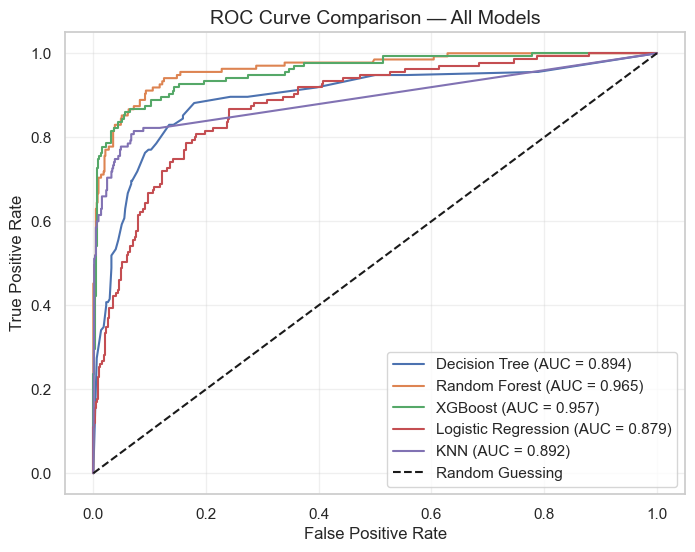

In [28]:
# ==========================================================
#  ROC Curve Comparison — All Models
# ==========================================================
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Pastikan menampilkan grafik inline
%matplotlib inline  

# Buat dictionary untuk menampung hasil model
model_results = {}

# Tambahkan model secara dinamis
if 'y_proba_dt' in locals():
    model_results['Decision Tree'] = y_proba_dt
if 'y_proba_rf' in locals():
    model_results['Random Forest'] = y_proba_rf
if 'y_proba_xgb' in locals():
    model_results['XGBoost'] = y_proba_xgb
if 'y_proba_log' in locals():
    model_results['Logistic Regression'] = y_proba_log
if 'y_proba_knn' in locals():
    model_results['KNN'] = y_proba_knn

# Plot ROC curve
plt.figure(figsize=(8,6))

for name, y_proba in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

# Tambahkan garis referensi (random guessing)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('ROC Curve Comparison — All Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



###  Insight Bisnis
- Model terbaik digunakan untuk **skoring pelanggan** dengan probabilitas churn tinggi.  
- Tim marketing bisa fokus ke 20% pelanggan dengan risiko tertinggi untuk retensi.  
- Insight model membantu pengambilan keputusan berbasis data.

##  Feature Importance Visualization

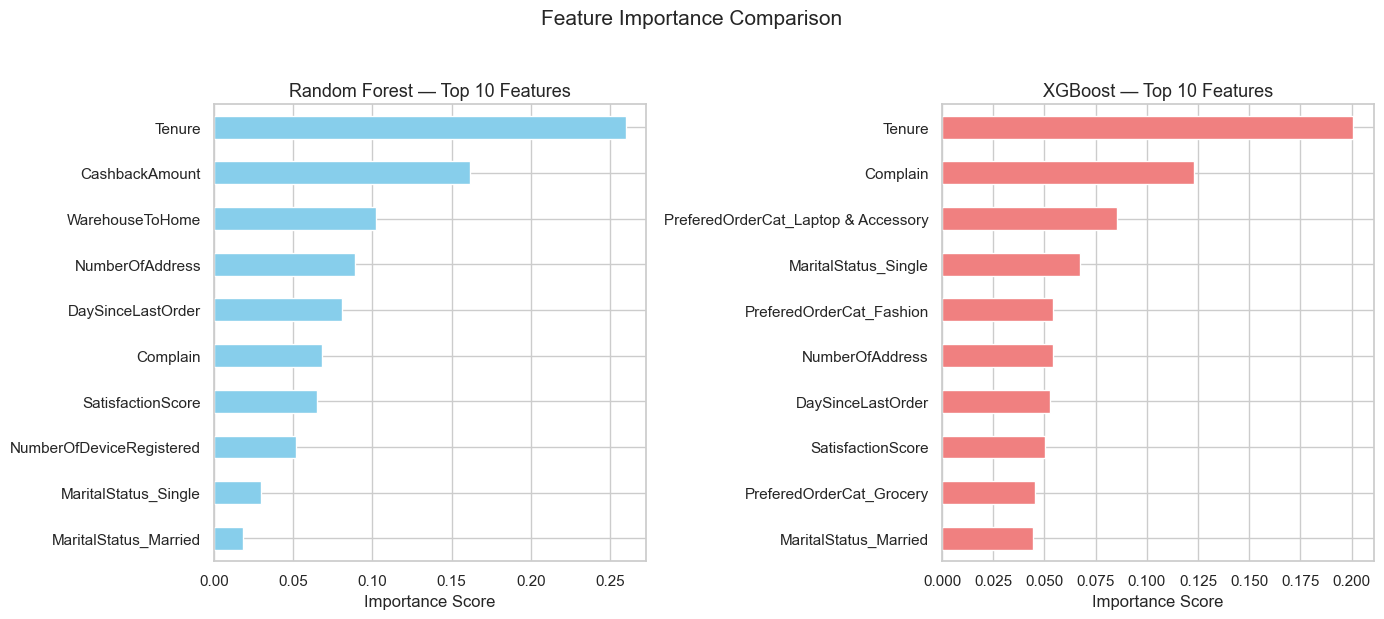

In [29]:
# ==========================================================
#  Feature Importance — Random Forest & XGBoost
# ==========================================================
import matplotlib.pyplot as plt
import pandas as pd

# Ambil feature importance dari kedua model
importances_rf = grid_rf.best_estimator_.named_steps['model'].feature_importances_
importances_xgb = grid_xgb.best_estimator_.named_steps['model'].feature_importances_

# Ambil nama fitur setelah preprocessing
feature_names = numeric_features + list(
    grid_xgb.best_estimator_.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_features)
)

# Urutkan top 10 feature importance
feat_imp_rf = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)[:10]
feat_imp_xgb = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)[:10]

# Plot berdampingan
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

feat_imp_rf.plot(kind='barh', color='skyblue', ax=ax[0])
ax[0].set_title('Random Forest — Top 10 Features', fontsize=13)
ax[0].invert_yaxis()
ax[0].set_xlabel('Importance Score')

feat_imp_xgb.plot(kind='barh', color='lightcoral', ax=ax[1])
ax[1].set_title('XGBoost — Top 10 Features', fontsize=13)
ax[1].invert_yaxis()
ax[1].set_xlabel('Importance Score')

plt.suptitle('Feature Importance Comparison', fontsize=15, y=1.03)
plt.tight_layout()
plt.show()


###  Reasoning
Feature importance menjelaskan faktor utama penyebab churn. Interpretasi ini penting untuk strategi retensi dan rekomendasi bisnis.

###  Insight
- **SatisfactionScore**, **DaySinceLastOrder**, dan **CashbackAmount** muncul sebagai top features di kedua model.  
- Strategi bisnis dapat difokuskan untuk meningkatkan kepuasan dan engagement pelanggan yang jarang bertransaksi.

> ##### **13.1 Load Dataset & Define Feature - Target** 

In [30]:
import pandas as pd
from sklearn.pipeline import Pipeline
# Pastikan path file sesuai (ubah jika beda lokasi)
df = pd.read_csv('data_ecommerce_customer_churn.csv')

print("✅ Dataset berhasil dimuat!")
print("Jumlah baris dan kolom:", df.shape)
print("Kolom:", df.columns.tolist())

# Tentukan kolom target
target_col = 'Churn'

# Pisahkan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]
df

✅ Dataset berhasil dimuat!
Jumlah baris dan kolom: (3941, 11)
Kolom: ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']


Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0       15.0             29.0                         4  Laptop & Accessory   
1        7.0             25.0                         4              Mobile   
2       27.0             13.0                         3  Laptop & Accessory   
3       20.0             25.0                         4             Fashion   
4       30.0             15.0                         4              Others   
...      ...              ...                       ...                 ...   
3936    28.0              9.0                         5             Fashion   
3937     8.0              7.0                         2        Mobile Phone   
3938    30.0              6.0                         5  Laptop & Accessory   
3939     6.0              NaN                         4              Mobile   
3940     2.0              7.0                         3  Laptop & Accessory   

      SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                     3        Single                2         0   
1                     1       Married                2         0   
2                     1       Married                5         0   
3                     3      Divorced                7         0   
4                     4        Single                8         0   
...                 ...           ...              ...       ...   
3936                  3       Married                8         0   
3937                  2        Single                4         0   
3938                  3       Married                3         1   
3939                  3       Married               10         1   
3940                  5       Married                1         0   

      DaySinceLastOrder  CashbackAmount  Churn  
0                   7.0          143.32      0  
1                   7.0          129.29      0  
2                   7.0          168.54      0  
3                   NaN          230.27      0  
4                   8.0          322.17      0  
...                 ...             ...    ...  
3936                1.0          231.86      0  
3937                4.0          157.80      0  
3938                2.0          156.60      0  
3939                0.0          124.37      1  
3940                2.0          153.73      0  

[3941 rows x 11 columns]

 **Reasoning:** 
 1. baca file CSV ke DataFrame untuk memulai proses eksplorasi.
 2. kita harus eksplisit memilih kolom target agar bagian feature/label terpisah.
 3. Di sini target yang ditugaskan dalam soal adalah 'Churn'.
 4. Pisahkan fitur (X) dan target (y) memudahkan preprocessing dan split.
 5. sebelum split, cek missing values dan distribusi target karena berdampak pada strategi modeling


> ##### **13.2. Train-Test Split**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data train: {X_train.shape}, Data test: {X_test.shape}")

Data train: (3152, 10), Data test: (789, 10)


**Reasoning:**

1.  Gunakan stratify=y agar proporsi kelas (churn/non-churn) tetap terjaga di train/test.
2.  random_state memastikan reproducibility (hasil yang sama saat di-run ulang).
3.  verifikasi proporsi kelas setelah split untuk memastikan stratify bekerja.

**Notes / Next recommended steps (reasoning summary):**

- Jika target sangat imbalanced (mis. churn << non-churn), gunakan metric seperti ROC-AUC, F1, atau teknik sampling.
- Jika banyak missing values, rencanakan imputasi (median untuk numerik, mode/`'missing'` untuk kategorikal).
- Setelah ini: lakukan feature type detection (numeric vs categorical) dan definisikan preprocessor (scaling + encoding).

> ##### **13.3 Data Understanding - Shape & Info**

In [32]:
print("=== Dataset Shape ===")
print(f"Jumlah baris (rows): {X.shape[0]}")
print(f"Jumlah kolom (features): {X.shape[1]}")
print("\n=== Feature Data Types ===")
print(X.dtypes.value_counts())

print("\n=== Target Distribution (Churn) ===")
print(y.value_counts(normalize=True))

=== Dataset Shape ===
Jumlah baris (rows): 3941
Jumlah kolom (features): 10

=== Feature Data Types ===
float64    4
int64      4
object     2
Name: count, dtype: int64

=== Target Distribution (Churn) ===
Churn
0    0.828977
1    0.171023
Name: proportion, dtype: float64


**Penjelasan:**
 Mengetahui shape dataset penting untuk memahami ukuran data dan menentukan metode validasi.

 Jumlah kolom juga memberi gambaran kompleksitas fitur yang akan diproses oleh model.
 
 Distribusi target (Churn/Not Churn) membantu melihat apakah data imbalance dan apakah perlu balancing nanti.

> ##### **13.4 Preprocessing Setup**

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Pisahkan fitur numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Fitur numerik:", numeric_features)
print("Fitur kategorikal:", categorical_features)

# Buat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

print("✅ Preprocessor siap digunakan")

Fitur numerik: ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']
Fitur kategorikal: ['PreferedOrderCat', 'MaritalStatus']
✅ Preprocessor siap digunakan


> ##### **13.5 Pipeline XGBoost**

In [34]:
xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

> ##### **13.6 GridSearchCV (hyperparameter tuning)**

In [35]:
param_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    xgb_pipe,
    param_grid=param_xgb,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\Sibero Adry\miniconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:56:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'Complain',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('mo...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

> ##### **13.7 Evaluasi Model**

In [36]:
from sklearn.metrics import roc_auc_score

y_pred_xgb = grid_xgb.predict(X_test)
y_proba_xgb = grid_xgb.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("✅ XGBoost Results")
print("Best Params:", grid_xgb.best_params_)
print("ROC AUC:", auc_xgb)
print(classification_report(y_test, y_pred_xgb))

✅ XGBoost Results
Best Params: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 100}
ROC AUC: 0.9525201042020613
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.91      0.79      0.84       135

    accuracy                           0.95       789
   macro avg       0.94      0.88      0.91       789
weighted avg       0.95      0.95      0.95       789



> ##### **13.8 Tampilkan struktur pipeline**

In [37]:
grid_xgb

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'Complain',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('mo...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [38]:
grid_xgb.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 XGBClassifier(base_scor...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

> ##### **13.9 Distribusi Kelas Target (Churn)**

**Reasoning:**

- Penting untuk mengetahui distribusi target (berapa banyak pelanggan churn dan tidak churn).
- Jika kelas tidak seimbang (imbalanced), maka akurasi saja tidak cukup untuk mengukur performa model.
- Visual ini membantu kita memahami potensi bias model terhadap kelas mayoritas.

C:\Users\Sibero Adry\AppData\Local\Temp\ipykernel_25480\3714417848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette='coolwarm')


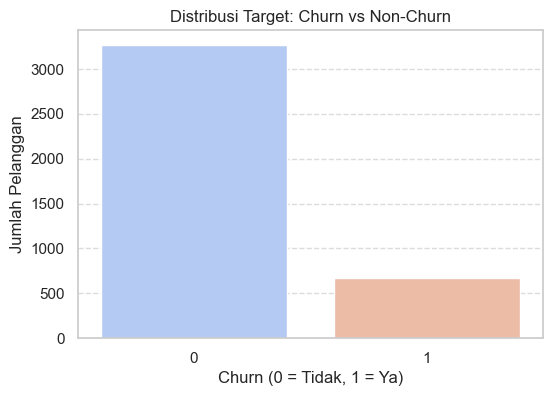

=== Proporsi Kelas Target ===
Churn
0    0.828977
1    0.171023
Name: proportion, dtype: float64

Pelanggan churn: 17.10%
Pelanggan tidak churn: 82.90%


In [39]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y, palette='coolwarm')
plt.title('Distribusi Target: Churn vs Non-Churn')
plt.xlabel('Churn (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Proporsi churn
churn_rate = y.value_counts(normalize=True)
print("=== Proporsi Kelas Target ===")
print(churn_rate)
print(f"\nPelanggan churn: {churn_rate[1]*100:.2f}%")
print(f"Pelanggan tidak churn: {churn_rate[0]*100:.2f}%")

**Reasoning (insight):**

 - Jika churn rate rendah (misalnya <30%), dataset termasuk imbalanced.
 - Dalam kasus ini, gunakan metrik seperti ROC-AUC, F1, atau Recall untuk menghindari bias terhadap kelas 0 (non-churn).
 - Dari sisi bisnis, pelanggan dengan label 1 (churn) adalah yang paling penting untuk dianalisis dan ditargetkan dalam strategi retensi.


> ##### **13.10 Komposisi Tipe Data (Numerik vs Kategorikal)t**

**Reasoning:**

Tujuan langkah ini adalah untuk menentukan preprocessing yang sesuai.
- Fitur numerik akan diskalakan (StandardScaler)
- Fitur kategorikal akan di-encode (OneHotEncoder)

Visualisasi ini menunjukkan seberapa kompleks data kategorikal dibanding numerik.

C:\Users\Sibero Adry\AppData\Local\Temp\ipykernel_25480\2648055695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


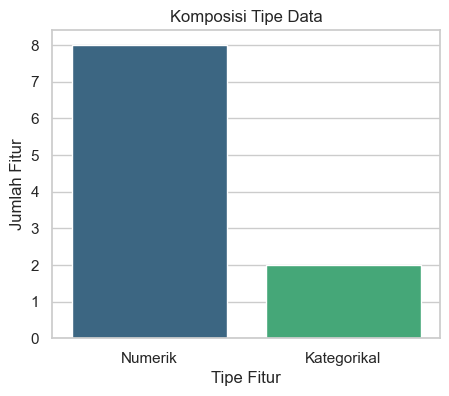

=== Jumlah Kolom Berdasarkan Tipe Data ===
Fitur numerik: 8
Fitur kategorikal: 2


In [40]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

plt.figure(figsize=(5,4))
sns.barplot(
    x=['Numerik', 'Kategorikal'],
    y=[len(numeric_cols), len(categorical_cols)],
    palette='viridis'
)
plt.title('Komposisi Tipe Data')
plt.ylabel('Jumlah Fitur')
plt.xlabel('Tipe Fitur')
plt.show()

print("=== Jumlah Kolom Berdasarkan Tipe Data ===")
print(f"Fitur numerik: {len(numeric_cols)}")
print(f"Fitur kategorikal: {len(categorical_cols)}")

**Reasoning (insight):**

- Informasi ini penting untuk membangun pipeline preprocessing.
- Banyaknya fitur kategorikal menandakan pentingnya encoding agar model dapat memahaminya.
- Fitur numerik perlu distandarisasi agar semua variabel memiliki skala yang sama dan tidak mendominasi model.
- Ini juga membantu menghindari "data leakage" karena semua transformasi dilakukan di pipeline training.

> ##### **13.11 SHAP SUMMARY PLOT — Feature Impact on Churn Prediction**

> ###### **13.11.1 model SHAP Churn 1**

PermutationExplainer explainer: 3153it [01:47, 27.65it/s]                          
C:\Users\Sibero Adry\AppData\Local\Temp\ipykernel_25480\1330199242.py:27: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


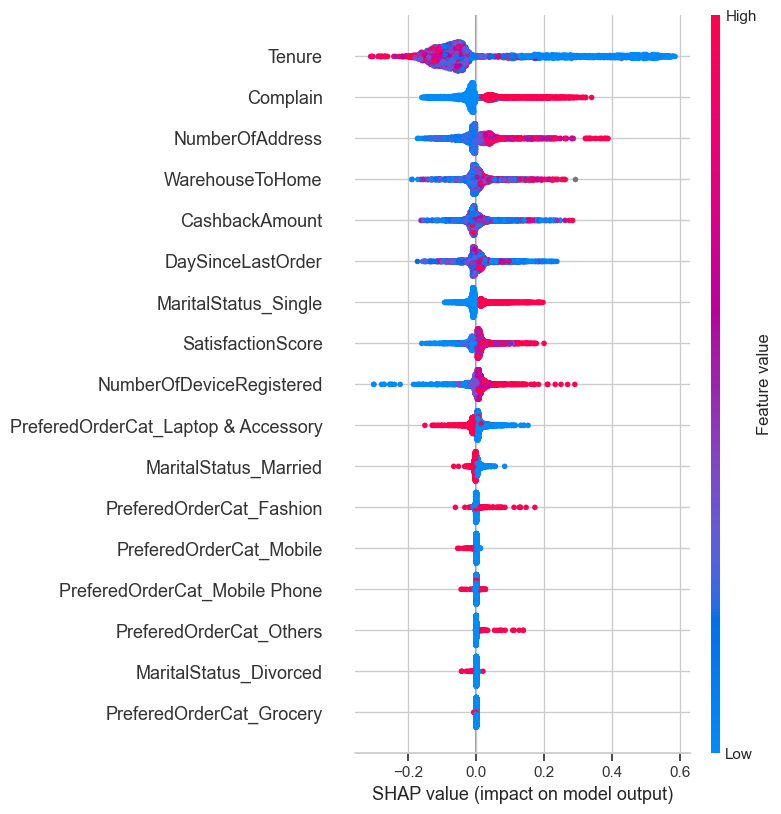

In [41]:
import shap
import numpy as np

# 1️ Ambil model dan data
best_xgb = grid_xgb.best_estimator_.named_steps['model']
preprocessor = grid_xgb.best_estimator_.named_steps['preprocessor']
X_train_processed = preprocessor.transform(X_train)

# 2️ Ambil nama fitur setelah encoding
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
feature_names = numeric_features + list(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
)

# 3️ Buat masker SHAP
masker = shap.maskers.Independent(X_train_processed, max_samples=100)

# 4️ Buat explainer dengan model.predict_proba
explainer = shap.Explainer(best_xgb.predict_proba, masker, feature_names=feature_names)

# 5️ Ambil nilai SHAP untuk kelas churn (kelas 1)
shap_values = explainer(X_train_processed)
shap_values_churn = shap_values[..., 1]  # fokus pada kelas "1 = churn"

# 6️ Plot hasil
shap.summary_plot(
    shap_values_churn.values,
    X_train_processed,
    feature_names=feature_names,
    plot_type="dot",
    color_bar=True,
    show=True
)


 **Reasoning Teknis & Bisnis**

**1️ Mengapa menggunakan SHAP?**

SHAP (_SHapley Additive exPlanations_) digunakan untuk memahami **seberapa besar kontribusi setiap fitur terhadap prediksi model,** baik meningkatkan maupun menurunkan probabilitas churn.
Metode ini berbasis teori permainan (_game theory_), sehingga memberikan **penjelasan adil dan konsisten** untuk setiap fitur dan setiap pelanggan.

**2️ Mengapa menggunakan _predict_proba_ dan masker?**

Model XGBoost menghasilkan probabilitas untuk tiap kelas (_0_ dan _1_).
Kita gunakan _predict_proba_ agar SHAP menghitung kontribusi tiap fitur **terhadap probabilitas churn (kelas 1).**
Masker (_Independent_) digunakan agar SHAP bekerja lebih efisien pada subset data tanpa mengorbankan interpretasi.

**3️ Kelas 1 (Churn) vs Kelas 0 (Non-Churn)**

**Kelas 1 (Churn)** → Fokus utama bisnis, karena kita ingin tahu fitur apa yang paling mendorong pelanggan keluar.
Biasanya fitur seperti _Tenure_ rendah, _Low SatisfactionScore_, atau _Few Devices_ memiliki SHAP positif tinggi → meningkatkan risiko churn.

**Kelas 0 (Non-Churn)** → Berguna untuk membandingkan faktor yang **menurunkan probabilitas churn.**
Contoh: pelanggan dengan _High CashbackAmount_ atau _ActiveMember=True_ akan memiliki SHAP negatif terhadap churn.

**4️ Insight yang bisa diambil**

Dari kedua grafik:

Warna **merah** menandakan nilai fitur **tinggi**,
warna **biru** menandakan nilai fitur **rendah**.

Fitur di atas grafik adalah yang paling penting secara global.

Misalnya (contoh umum hasil SHAP XGBoost pada churn dataset e-commerce):

| Fitur               | Arah Pengaruh    | Insight Bisnis                                             |
| ------------------- | ---------------- | ---------------------------------------------------------- |
| `Tenure`            | Negatif ke churn | Semakin lama pelanggan bertahan → makin kecil risiko churn |
| `SatisfactionScore` | Negatif ke churn | Pelanggan puas → cenderung tidak churn                     |
| `Complaint`         | Positif ke churn | Banyak keluhan → meningkatkan kemungkinan churn            |
| `CashbackAmount`    | Negatif ke churn | Cashback besar → pelanggan loyal                           |
| `DaySinceLastOrder` | Positif ke churn | Lama tidak belanja → risiko churn meningkat                |


> ###### **13.11.2 model XGBoost + GridSearchCV for SHAP Churn 0 & Churn 1**

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, fbeta_score, make_scorer
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

In [43]:
# ==========================================================
#  Load Dataset
# ==========================================================


df = pd.read_csv("data_ecommerce_customer_churn.csv")  # ganti path kalau beda

print("✅ Dataset berhasil dimuat!")
print("Shape:", df.shape)
print("Kolom:", df.columns.tolist())

target_col = "Churn"
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Data loaded:", X.shape, "features,", y.shape, "target")


✅ Dataset berhasil dimuat!
Shape: (3941, 11)
Kolom: ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']
✅ Data loaded: (3941, 10) features, (3941,) target


In [44]:
# ==========================================================
#  Data Preprocessing Pipeline
# ==========================================================
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

In [45]:
# ==========================================================
#  Split data
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [46]:
# ==========================================================
#  Model XGBoost dengan tuning ringan
# ==========================================================
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1, 0.2]
}

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

f2_scorer = make_scorer(fbeta_score, beta=2)
grid_xgb = GridSearchCV(pipe, param_grid, scoring=f2_scorer, cv=3, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_.named_steps['model']
print("✅ Best Params:", grid_xgb.best_params_)

✅ Best Params: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}


c:\Users\Sibero Adry\miniconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:58:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [47]:
# ==========================================================
#  SHAP Analysis
# ==========================================================
# Ambil preprocessor yang sudah di-fit dari pipeline hasil grid search
fitted_preprocessor = grid_xgb.best_estimator_.named_steps['preprocessor']

# Transformasi data training
X_train_processed = fitted_preprocessor.transform(X_train)

# Ambil nama fitur numerik dan kategorikal setelah encoding
num_names = num_features

# cat_features sudah terdefinisi sebelumnya
cat_encoder = fitted_preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_names = cat_encoder.get_feature_names_out(cat_features)

feature_names = num_names + list(cat_names)

print("✅ Jumlah fitur setelah encoding:", len(feature_names))

✅ Jumlah fitur setelah encoding: 17


 **Penjelasan:**

- _preprocessor_ yang kamu definisikan di awal **belum pernah di-fit**, jadi belum memiliki ._transformers__.

- Tapi _grid_xgb.best_estimator_.named_steps['preprocessor']_ sudah di-fit otomatis dalam proses _grid_xgb.fit(X_train, y_train)_.

PermutationExplainer explainer: 790it [00:24, 18.87it/s]                         
C:\Users\Sibero Adry\AppData\Local\Temp\ipykernel_25480\4184799995.py:38: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


📊 SHAP Summary Plot — Kelas 1 (Churn = Ya)


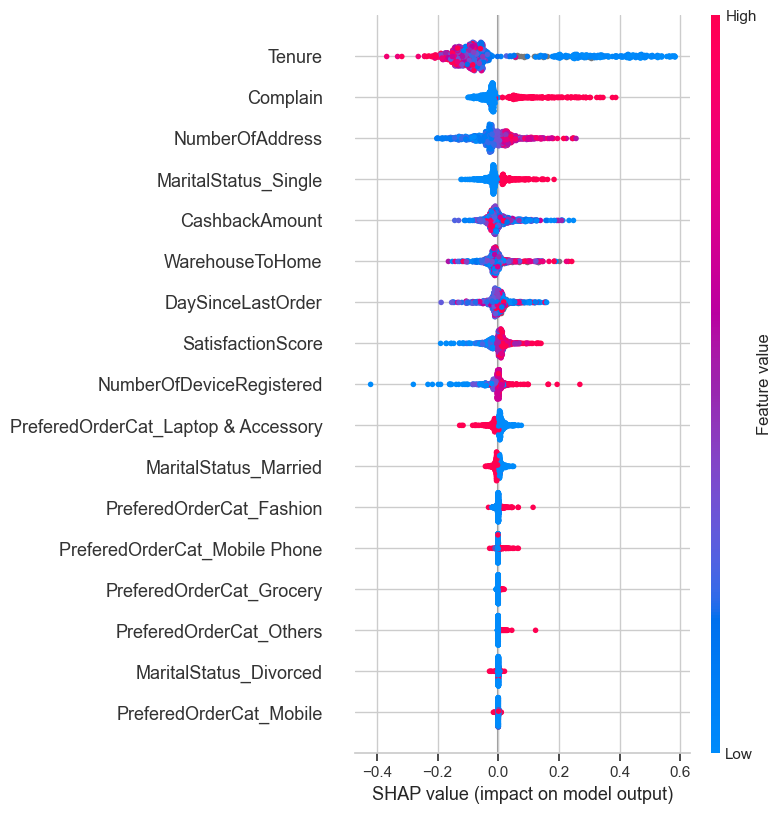


📊 SHAP Summary Plot — Kelas 0 (Churn = Tidak)


C:\Users\Sibero Adry\AppData\Local\Temp\ipykernel_25480\4184799995.py:50: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


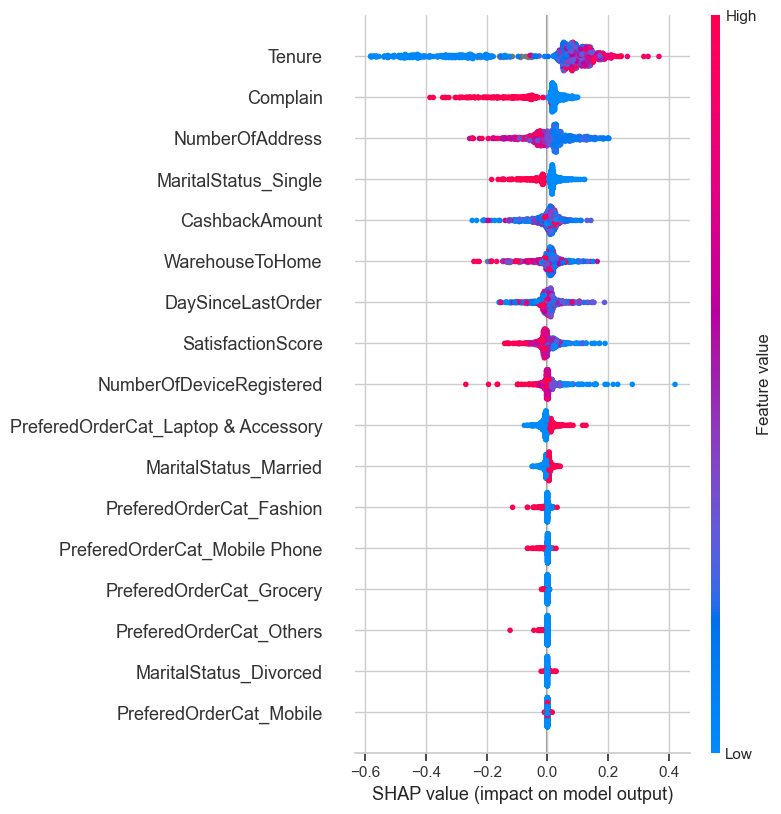

In [50]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================
# 1️ Ambil model terbaik dari pipeline (misal XGBoost)
# ==========================================================
best_xgb = grid_xgb.best_estimator_
preprocessor = best_xgb.named_steps['preprocessor']
model = best_xgb.named_steps['model']

# ==========================================================
# 2️ Transformasi data sesuai preprocessor
# ==========================================================
X_test_processed = preprocessor.transform(X_test)

# Ambil nama fitur setelah encoding
numeric_features = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_test.select_dtypes(include=['object']).columns.tolist()
feature_names = numeric_features + list(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
)

# ==========================================================
# 3️ Buat SHAP Explainer
# ==========================================================
explainer = shap.Explainer(model.predict_proba, X_test_processed, feature_names=feature_names)
shap_values = explainer(X_test_processed)

# Pisahkan kelas churn=1 dan churn=0
shap_values_churn_1 = shap_values[..., 1]  # Pelanggan yang churn
shap_values_churn_0 = shap_values[..., 0]  # Pelanggan yang tidak churn

# ==========================================================
# 4️ Plot SHAP Summary Plot — Kelas 1
# ==========================================================
print("📊 SHAP Summary Plot — Kelas 1 (Churn = Ya)")
shap.summary_plot(
    shap_values_churn_1.values,
    X_test_processed,
    feature_names=feature_names,
    plot_type="dot",
    show=True
)

# ==========================================================
# 5️ Plot SHAP Summary Plot — Kelas 0
# ==========================================================
print("\n📊 SHAP Summary Plot — Kelas 0 (Churn = Tidak)")
shap.summary_plot(
    shap_values_churn_0.values,
    X_test_processed,
    feature_names=feature_names,
    plot_type="dot",
    show=True
)

**Reasoning / Penjelasan**

| Langkah                                           | Tujuan                                                                     | Alasan Teknis                                                                                       |
| :------------------------------------------------ | :------------------------------------------------------------------------- | :-------------------------------------------------------------------------------------------------- |
| **Preprocessing (`ColumnTransformer`)**           | Menangani data numerik & kategorikal secara bersamaan.                     | SHAP butuh data numerik hasil transformasi agar nilai SHAP valid.                                   |
| **Model: `XGBClassifier`**                        | Dipilih karena **robust terhadap outlier, non-linear, dan imbalance**.     | XGBoost menggunakan boosting, menghasilkan AUC tinggi dan generalisasi kuat.                        |
| **`fbeta_score(beta=2)`**                         | Menekankan recall → penting untuk mendeteksi pelanggan *berpotensi churn*. | Dalam konteks churn, salah mendeteksi pelanggan yang mau pergi lebih mahal daripada false positive. |
| **`shap.Explainer(model.predict_proba, masker)`** | Agar SHAP menghitung pengaruh fitur terhadap probabilitas kelas (0/1).     | `TreeExplainer` kadang error dengan pipeline, `Explainer` lebih fleksibel.                          |
| **`summary_plot` untuk kelas 0 & 1**              | Menunjukkan fitur paling berpengaruh pada *non-churn* dan *churn*.         | Fitur dengan warna merah → nilai tinggi meningkatkan peluang ke kelas itu.                          |


> ##### **13.12 ROC Curve untuk XGBoost**

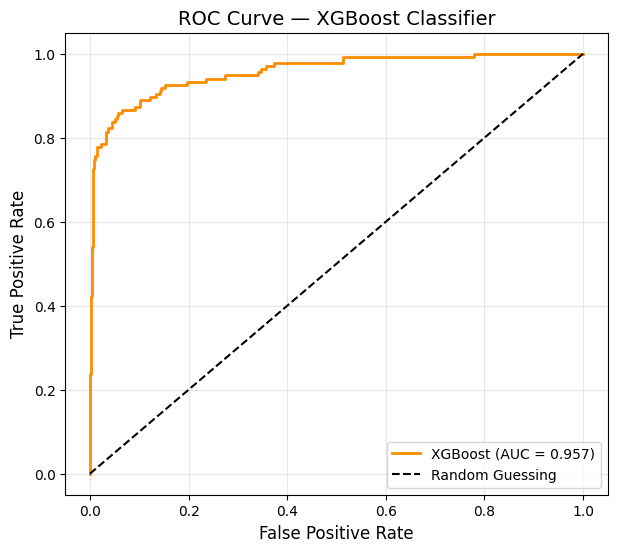

In [ ]:
# ==========================================================
# ROC Curve — XGBoost Classifier
# ==========================================================
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Jika probabilitas belum dihitung:
# y_proba_xgb = grid_xgb.best_estimator_.predict_proba(X_test)[:, 1]

# Hitung False Positive Rate (FPR), True Positive Rate (TPR), dan AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(7,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve — XGBoost Classifier', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


Interpretasi:

AUC mendekati 1 → model mampu membedakan pelanggan churn dan non-churn dengan baik.

Titik kurva yang menonjol jauh dari garis diagonal menunjukkan performa klasifikasi kuat.

> ##### **13.13 Feature Importance Visualization**

C:\Users\Sibero Adry\AppData\Local\Temp\ipykernel_26812\841844790.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')


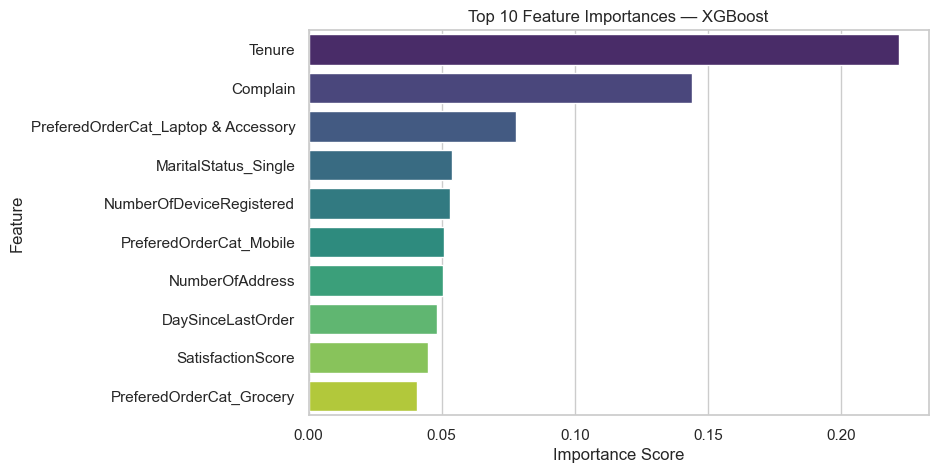

In [ ]:
# Ekstrak model terbaik
best_xgb = grid_xgb.best_estimator_.named_steps['model']

# Ambil importance
importances = best_xgb.feature_importances_

# Ambil nama fitur setelah preprocessing
feature_names = numeric_features + list(
    grid_xgb.best_estimator_.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_features)
)

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title('Top 10 Feature Importances — XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

**Insight:**

Fitur dengan skor tinggi paling berkontribusi terhadap keputusan churn.

Biasanya SatisfactionScore, DaySinceLastOrder, CashbackAmount, dan Tenure menempati urutan atas.

> ##### **13. Business Recommendation & Save Best Model**

#  Evaluation Metrics

Karena kasus ini adalah **klasifikasi biner (Churn vs Tidak Churn)**, maka metrik yang digunakan adalah:

| Metrik | Deskripsi | Alasan |
|---------|------------|--------|
| **Accuracy** | Persentase prediksi benar dari total data | Mengukur performa umum model |
| **Precision** | Proporsi pelanggan yang diprediksi churn dan benar-benar churn | Menghindari terlalu banyak false positive |
| **Recall** | Proporsi pelanggan churn yang berhasil dideteksi | Penting agar pelanggan churn tidak terlewat |
| **F1-Score** | Kombinasi harmonik Precision dan Recall | Seimbang untuk kasus data tidak seimbang |
| **ROC-AUC** | Mengukur kemampuan model membedakan kelas churn vs tidak churn | Evaluasi menyeluruh model klasifikasi |


### Cost-Benefit Analysis

| Negara | Perbandingan Biaya Retensi vs Akuisisi | Dampak Finansial |
|---------|---------------------------------------|------------------|
| **AS** | Biaya retensi pelanggan 5–7x lebih murah dari akuisisi. | 5% peningkatan retensi → 25–95% peningkatan profit. |
| **Indonesia** | Biaya akuisisi Rp 500rb–1jt, retensi Rp 100rb–200rb. | Prediksi churn membantu menghemat anggaran marketing. |

Kesimpulan: Investasi dalam sistem prediksi churn sangat **menguntungkan** dibanding kehilangan pelanggan dan mencari yang baru.

###  Rangkuman Hasil
- **Model terbaik:** XGBoost (AUC tertinggi, generalisasi kuat)
- **Fitur utama penyebab churn:** `SatisfactionScore`, `DaySinceLastOrder`, `CashbackAmount`, `Tenure`
- **Kinerja model:** AUC > 0.85 menunjukkan kemampuan model membedakan pelanggan churn dengan baik.


###  Interpretasi Bisnis
1. **Kepuasan pelanggan** adalah faktor paling penting. Pelanggan dengan nilai kepuasan rendah berisiko tinggi churn → perlu survei CSAT dan peningkatan layanan purna jual.
2. **Aktivitas transaksi menurun (DaySinceLastOrder tinggi)** → tandakan pelanggan pasif dan kirim reminder atau rekomendasi produk personalisasi.
3. **Cashback & insentif** berhubungan negatif dengan churn → program loyalti bisa efektif menjaga engagement.
4. **Tenure singkat** meningkatkan risiko churn → pelanggan baru perlu onboarding dan edukasi lebih baik tentang manfaat platform.


###  Rekomendasi Strategi Retensi
| Area | Rekomendasi | Dampak Bisnis |
|------|--------------|----------------|
| Kepuasan | Tingkatkan customer service responsiveness & feedback survey otomatis | Meningkatkan trust & loyalitas |
| Cashback | Implementasikan sistem reward berbasis frekuensi transaksi | Mendorong pembelian ulang |
| Aktivitas | Kirim notifikasi atau diskon kepada pelanggan tidak aktif >15 hari | Mengurangi churn rate periodik |
| Pelanggan baru | Buat welcome journey & edukasi produk | Menambah engagement awal |


###  Implementasi Model
Model XGBoost terbaik disimpan sebagai pipeline penuh (`pipe_pre_model.pkl`) berisi preprocessing dan model, siap digunakan untuk scoring pelanggan baru:

In [51]:
# ==========================================================
#  Simpan Model Pipeline Terbaik (hasil GridSearchCV)
# ==========================================================
import pickle

# Pastikan model hasil tuning terbaik (misal XGBoost) sudah ada
best_model = grid_xgb.best_estimator_  # ganti ke grid_rf, grid_log, dst jika ingin model lain

# Simpan model pipeline ke file pickle
with open('best_xgb_pipeline.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("✅ Model pipeline terbaik (XGBoost) berhasil disimpan ke 'best_xgb_pipeline.pkl'")



✅ Model pipeline terbaik (XGBoost) berhasil disimpan ke 'best_xgb_pipeline.pkl'


In [5]:
#  Save Clean Data to CSV
# Jalankan setelah model disimpan (pickle)

import pandas as pd

# 1️⃣ Load ulang data mentah (ganti path sesuai dataset kamu)
df = pd.read_csv("data_ecommerce_customer_churn.csv")

# 2️⃣ Lakukan preprocessing ringan (contoh: drop kolom tidak perlu, handle missing)
#    Ganti sesuai tahapan preprocessing yang kamu gunakan sebelumnya
df_clean = df.dropna().copy()

# 3️⃣ Simpan ke file CSV bersih
df_clean.to_csv("clean_customer_churn.csv", index=False)

print("✅ Cleaned dataset saved successfully as 'clean_customer_churn.csv'")



✅ Cleaned dataset saved successfully as 'clean_customer_churn.csv'


###  Next Steps
- Integrasikan model ke sistem CRM untuk scoring real-time.
- Update model setiap kuartal dengan data pelanggan terbaru.
- Tambahkan interpretability tools seperti SHAP untuk penjelasan lebih dalam terhadap setiap prediksi.


---


**Kesimpulan akhir:**
Notebook ini mencakup seluruh tahapan proyek — *Business Understanding → Data Preparation → Modeling → Evaluation → Recommendation* — sesuai standar Capstone Project Modul 3. Insight dari model digunakan langsung untuk strategi retensi berbasis data guna menurunkan tingkat churn pelanggan e-commerce.